In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mcolors
import numpy as np
from levels import *
%matplotlib inline

# Define the colors for the modified blue gradient
colors = ['#A6B5CC', '#008B8B', '#000000', '#FF0000', '#FF00FF']
color_positions = [0.0, 0.8, 0.85, 0.92, 1.0]
# Create a custom colormap using LinearSegmentedColormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_blue_gradient", list(zip(color_positions, colors)))


def printMap(level):
    pixel_plot = plt.figure()
    pixel_plot.add_subplot()
    plt.title("Map")
    pixel_plot = plt.imshow(level, cmap=custom_cmap, interpolation='nearest', origin='upper', vmax=11)
    plt.colorbar(pixel_plot)
    plt.show()

def putPixel(level, position, value):
    x = position[0]
    y = position[1]
    level[y][x] = value

In [2]:
# Ratkaistava ongelma
from search_algos import *
import random

starts = [[random.randint(1, 63), random.randint(1, 63)] for _ in range(5)]
finishes = [[random.randint(1, 63), random.randint(1, 63)] for _ in range(5)]


initialState = starts[0]
goalState = finishes[0]

# actionit taulukoituna: (0 suuntaa)
actions = [[-1, 0], [1, 0],[0, -1], [0, 1]]
#actions = [[-1, 0], [1, 0],[0, -1], [0, 1], [-1, -1], [1, 1], [1, -1], [-1, 1]]

# Laillisen tilan tarkastusfunktio:
def isLegalState(state):
    x = state[0]
    y = state[1]
    if( x < 0 or y < 0):
        return False
    if( y >= len(level) or x >= len(level[y]) ):
        return False
    return level[y][x] < 9 #estetään seinien läpi kävely


    


In [3]:
import time

# leveysuunnattu dijkstra:
#goaledNode, openList = searhPathFindInGrid(initialState, goalState, isLegalState, level, actions, popBestG)

# ahne dijkstra:
#goaledNode, openList = searhPathFindInGrid(initialState, goalState, isLegalState, level, actions, popBestH)

# A*
start_time = time.time()
goaledNode, openList, closedList = searhPathFindInGrid(initialState, goalState, isLegalState, level, actions, popBestF)
end_time = time.time()
execution_time_BestF = end_time - start_time
name = "A*"


suoritusaika = (f"{execution_time_BestF:.2f}")


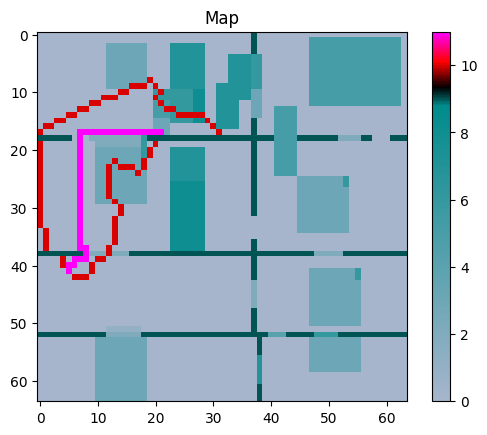

  nimi suoritusaika kustannus  solmut
0   A*         0.02      50.0     987


In [4]:
import pandas as pd
import os



def printNodeOnLevel(node):
    putPixel(level, node.state, 11)

def printOpenNodeOnLevel(node):
    putPixel(level, node.state, 10)

traversePath(goaledNode, printNodeOnLevel)

for openNode in openList:
    printOpenNodeOnLevel(openNode)

printMap(level)




solmut = len(openList) + len(closedList)
kustannus = str(goaledNode.totalG)




# Oletetaan, että meillä on DataFrame
data = {
    "nimi": [name],
    "suoritusaika": [suoritusaika],
    "kustannus": [kustannus],
    "solmut": [solmut]
}

df = pd.DataFrame(data)


file_path = "testi.csv"
if not os.path.exists(file_path):
    # Jos tiedostoa ei ole, luodaan se ja lisätään otsikot
    df.to_csv(file_path, index=False)
else:
    # Jos tiedosto on olemassa, lisätään tiedot ilman otsikoita
    df.to_csv(file_path, mode='a', index=False, header=False)


print(df[["nimi", "suoritusaika", "kustannus", "solmut"]])







[Source](https://www.youtube.com/watch?v=Q30m_-8nh3Y&list=PLadRxrHJkUqzoVmzO-CQWwhO93IAjChOp&index=18)

In [5]:


# Luetaan CSV-tiedosto DataFrameksi
df = pd.read_csv("testi.csv")

# Tulostetaan DataFrame varmistaaksemme, että tiedot on ladattu oikein
print(df)





  nimi  suoritusaika  kustannus  solmut
0   A*          0.01       34.0     729
1   A*          0.16       79.0    2821
2   A*          0.21       95.0    3197
3   A*          0.96      121.0    6855
4   A*          0.00       25.0     175
5   A*          0.02       50.0     987
